#Verification numerique de la loi binomiale et de sa convergence vers la loi normale pour n grand

In [154]:
import random as r
import matplotlib.pyplot as plt
import numpy as np
from math import * 
from scipy.special import comb

#Experimentation 
realise les tirages

## Version lente

In [155]:
def tirages_lent(nb_tirages=100,n=10,p=0.7):
    """"
    Cette fonction permet de faire nb_tirages tirages de n epreuves
    La probabilité de succes d'une epreuve est p
    Retourne une liste avec la probabilité P(X=k) avec k le nombre de succes
    """ 
    resultat_tirage = [0]*(n+1)
    for j in range(nb_tirages):
        nb_succes = 0
        rdt = [] #resultat du tirage
        for i in range(n):
            a=r.random()
            if a < p:
                nb_succes+=1
        resultat_tirage[nb_succes]+=1
    prob=[]
    for i in range(n+1):
        prob.append(resultat_tirage[i]/nb_tirages)
    K= [i for i in range(n+1)]
    return K,prob

## Version optimisée
Utilise le numpy pour faire tous les tirages aleatoires d'un seul coup

In [156]:
def tirages_opti(nb_tirages=100,n=10,p=0.7):
    """"
    Cette fonction permet de faire nb_tirages tirages de n epreuves
    La probabilité de succes d'une epreuve est p
    Retourne une liste avec la probabilité P(X=k) avec k le nombre de succes
    """ 
    resultat_tirage = [0]*(n+1)
    tirages= np.random.rand(nb_tirages,n)
    succes  = tirages<p
    nb_succes=np.sum(succes,axis=1)
    print
    prob=[]
    for k in range(n+1):
        prob.append(np.sum(nb_succes==k)/nb_tirages)
    K= [i for i in range(n+1)]
    return K,prob


In [157]:
tirages_opti(100,5,0.5)

([0, 1, 2, 3, 4, 5], [0.02, 0.18, 0.2, 0.37, 0.2, 0.03])

#Parametres

Changer les parametres ici:


*  n: le nombre d'epreuve
*  p: la probabilité de succes
*  nb_tirages: nombre de fois ou on refait l'experience


In [158]:
no=2

if no ==1:
  n = 5
  nb_tirages = 100000
  p=0.3
  print("dans cette exemple n est petit donc l'approximation de la loi binomiale par la loi normale ne fonctionne pas")
elif no == 2:
  n = 50
  nb_tirages = 100000
  p=0.3
  print("dans cette exemple n est grand donc l'approximation de la loi binomiale par la loi normale fonctionne")
else:
  n = 50
  nb_tirages = 10
  p=0.3
  print("dans cette exemple le nombre de tirage est petit donc les valeur mesurés peuvent etre differentes des valeur theorique des probabilités")

dans cette exemple n est grand donc l'approximation de la loi binomiale par la loi normale fonctionne


#Calculs
effectue nb_tirages de n epreuve
calcule la moyenne ecart type theorique

In [159]:
K,experimental=tirages_opti(nb_tirages,n,p)
esperance = n*p
sigma = sqrt(n*p*(1-p))
print('esperance:',esperance,'ecart-type:',sigma)

esperance: 15.0 ecart-type: 3.24037034920393


#Affichage
## Comparaison avec la valeur theorique de la loi binomiale

In [160]:
def loi_Binomiale(n):
  Pb=[]
  for k in range(n+1):
    Pb.append(comb(n,k)*p**k*(1-p)**(n-k))
  return Pb

Text(0, 0.5, 'probabilité')

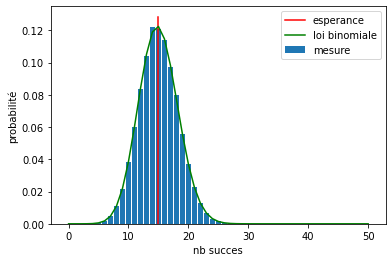

In [161]:
prob_binomiale=loi_Binomiale(n)
plt.figure()
plt.bar(K,experimental,label='mesure')
y=plt.ylim()
plt.plot([esperance,esperance],y,'r',label='esperance')
plt.plot(K,prob_binomiale,'g',label = 'loi binomiale')
plt.legend()
plt.xlabel('nb succes')
plt.ylabel('probabilité')

## Comparaison de la loi binomiale avec la loi normale (valide uniquement pour n suffisament grand)

In [162]:
def loi_normale(sigma,mu,n):
  Z=np.linspace(0,n,60)
  Pz=1/(sigma*sqrt(2*pi))*np.exp(-0.5*((Z-mu)/sigma)**2)
  return Z,Pz

Text(0, 0.5, 'probabilité')

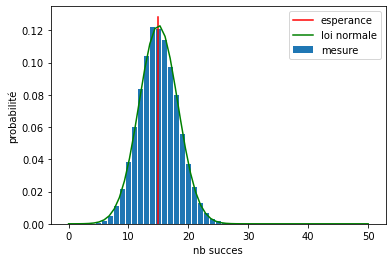

In [163]:
Z,Pz=loi_normale(sigma,esperance, n)
plt.figure()
plt.bar(K,experimental,label='mesure')
y=plt.ylim()
plt.plot([esperance,esperance],y,'r',label='esperance')

plt.plot(Z,Pz,'g',label = 'loi normale')
plt.legend()
plt.xlabel('nb succes')
plt.ylabel('probabilité')

Text(0, 0.5, 'probabilité')

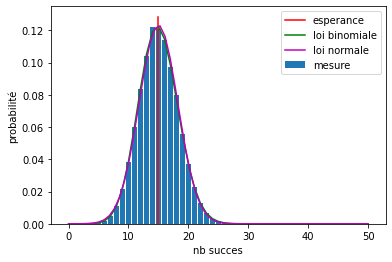

In [164]:
plt.figure()
plt.bar(K,experimental,label='mesure')
y=plt.ylim()
plt.plot([esperance,esperance],y,'r',label='esperance')
plt.plot(K,prob_binomiale,'g',label = 'loi binomiale')
plt.plot(Z,Pz,'m',label = 'loi normale')
plt.legend()
plt.xlabel('nb succes')
plt.ylabel('probabilité')
